# Base

 

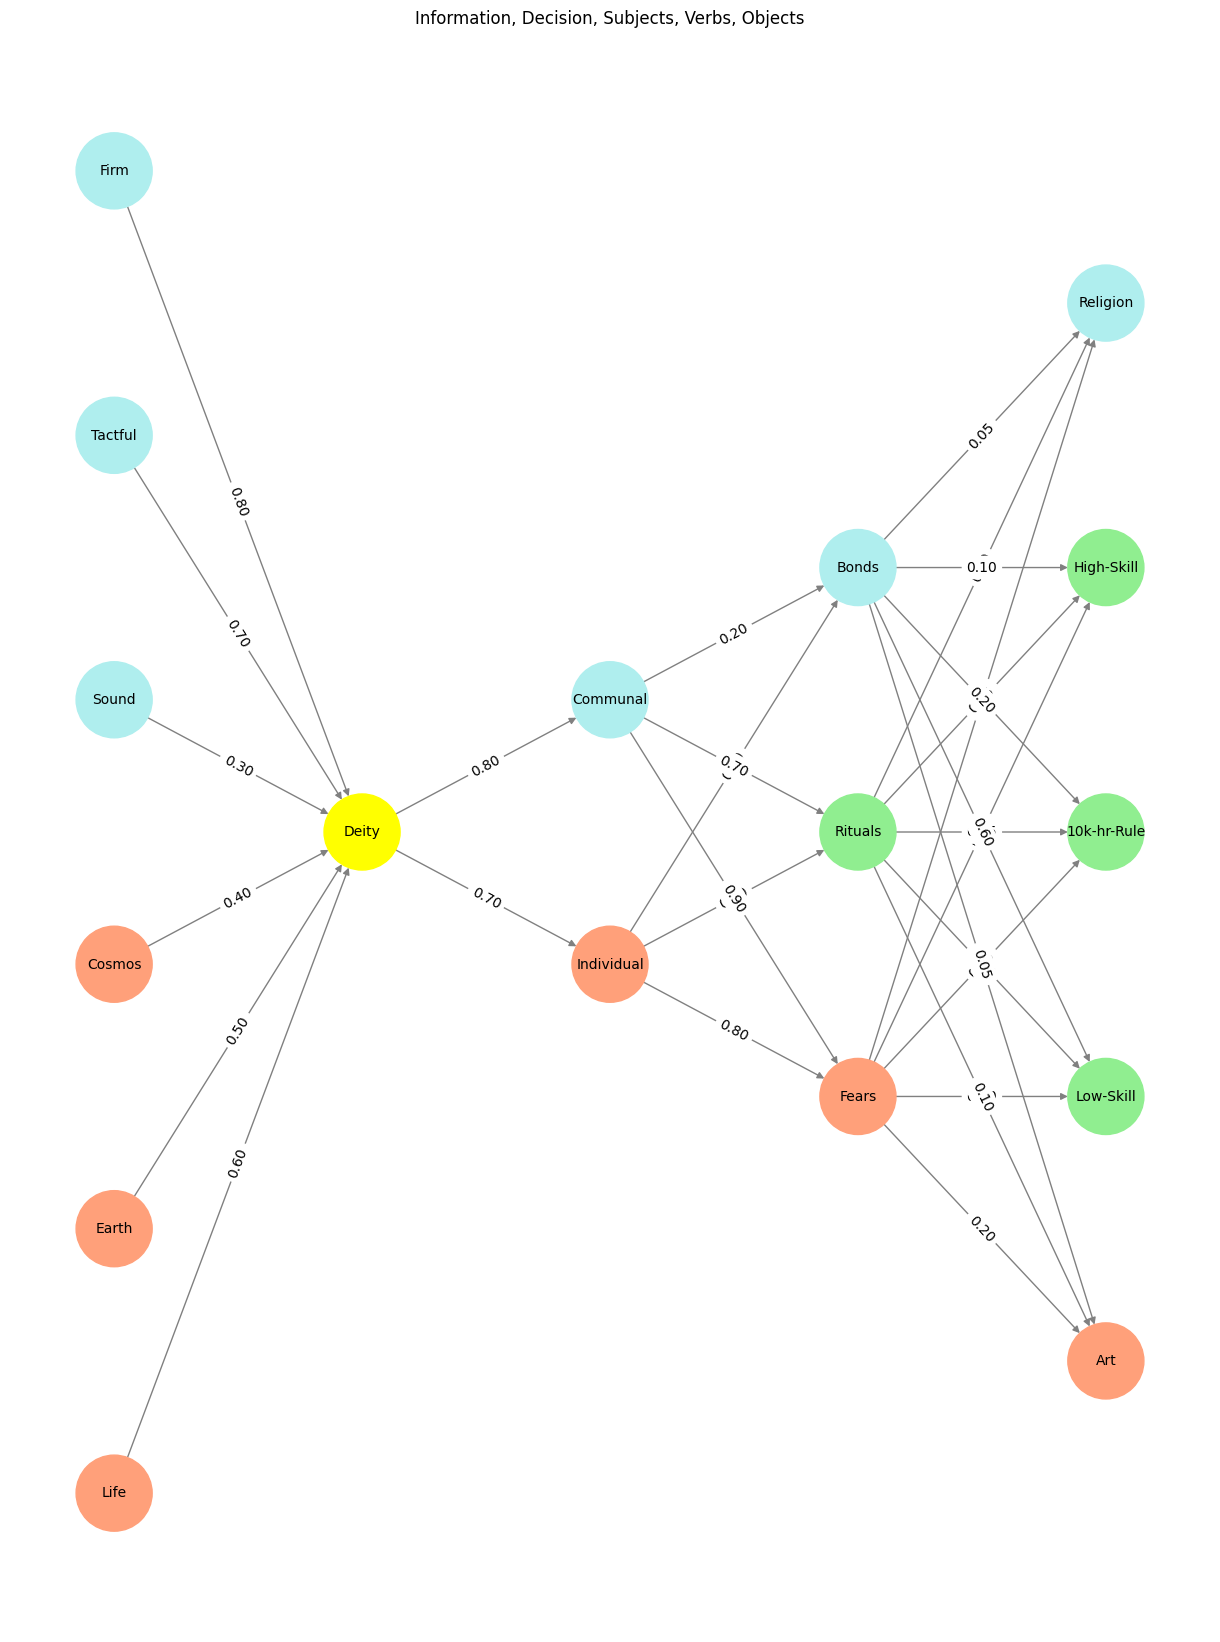

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Life','Earth', 'Cosmos', 'Sound', 'Tactful', 'Firm', ],
        'Yellowstone': ['Deity'],
        'Input': ['Individual', 'Communal'],
        'Hidden': [
            'Fears',
            'Rituals',
            'Bonds',
        ],
        'Output': ['Art', 'Low-Skill', '10k-hr-Rule', 'High-Skill', 'Religion',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Deity':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', 'Tactful', 'Firm']:
        return 'paleturquoise'
    elif layer == 'Input' and node == 'Communal':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Bonds':
            return 'paleturquoise'
        elif node == 'Rituals':
            return 'lightgreen'
        elif node == 'Fears':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Religion':
            return 'paleturquoise'
        elif node in ['High-Skill', '10k-hr-Rule', 'Low-Skill']:
            return 'lightgreen'
        elif node == 'Art':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title("Information, Decision, Subjects, Verbs, Objects")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

#


```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
Paleturquoise, lightgreen, lightsalmon: _Paradiso_, _Purgatorio_, _Inferno_. The color-coding corresponds to Dante's *Magna Opera* {cite}`alighieri1984paradiso` {cite}`alighieri1984purgatorio` {cite}`alighieri1984inferno`. And the lightgray represents the raw, unprocessed, yet-to-be transformed inputs. These triadic themes spawn an unlimited number of variants. For instance, the adversary-identity-tokenization-joy nodes can be thought of as [tragical-comical-historical-pastoral](https://www.gutenberg.org/files/1524/1524-h/1524-h.htm). They align with the tragedy of commons, mistaken identity as the most accessible resource for comedy, and the history of mankind being a story of encoding everything into symbol, language, token, and commodity to facilitate dialogue
```
       

